<a href="https://colab.research.google.com/github/Jiipengentobat/DIF62130_B_25_2311532004/blob/main/Praktikum1/California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

ini adalah persiapan untuk membangun model regresi linear menggunakan dataset California Housing. Setelah ini, dataset bisa diolah lebih lanjut untuk normalisasi, eksplorasi data, dan pelatihan model regresi linear atau polinomial

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHousevalue'] = pd.Series(housing.target)

targets=df['MedHousevalue']
inputs=df.drop('MedHousevalue', axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHousevalue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Kode ini mempersiapkan data California Housing dengan memisahkan fitur (inputs) dan target (targets) untuk analisis

In [ ]:
print('Dataframe dimension; ', df.shape)
df.info()

Dataframe dimension;  (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHousevalue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Kode ini digunakan untuk menampilkan informasi dasar tentang dataset California Housing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


Kode ini digunakan untuk membagi dataset California Housing menjadi data latih dan data uji

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print (x_test)

[[8.14678418e-02 4.70588235e-01 2.34243862e-02 ... 2.56319369e-03
  3.73404255e-01 5.31872510e-01]
 [1.40094619e-01 5.68627451e-01 2.94319155e-02 ... 1.59940545e-03
  2.75531915e-01 4.87051793e-01]
 [2.05528200e-01 1.00000000e+00 2.18994569e-02 ... 5.37584539e-04
  5.58510638e-01 1.90239044e-01]
 ...
 [2.07728169e-01 2.94117647e-01 2.03757930e-02 ... 1.34975225e-03
  1.19148936e-01 6.41434263e-01]
 [2.17245279e-01 1.76470588e-01 3.27130659e-02 ... 2.29769634e-03
  5.60638298e-01 3.05776892e-01]
 [1.76004469e-01 3.13725490e-01 1.74931855e-02 ... 1.54725775e-03
  1.70212766e-01 6.08565737e-01]]


Kode ini digunakan untuk melakukan normalisasi fitur menggunakan MinMaxScaler, yang mengubah nilai setiap fitur ke dalam rentang 0 hingga 1

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

Kode ini digunakan untuk melatih model regresi linear menggunakan data latih yang sudah dinormalisasi

In [ ]:
print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

intercept: 3.6307047193242292
slope: [  6.46451636   0.49377527 -17.21787732  19.70092818  -0.02767764
  -4.1877334   -3.93424542  -4.35422728]


Kode ini digunakan untuk menampilkan parameter hasil pelatihan model regresi linear, intercept dan koefisien (slope).

In [ ]:
y_pred=lr_model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
r2=lr_model.score(x_test, y_test)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.530567782476675
R2: 0.5957702326061665


Kode ini digunakan untuk mengevaluasi performa model regresi linear menggunakan Mean Squared Error (MSE) dan R² Score pada data uji

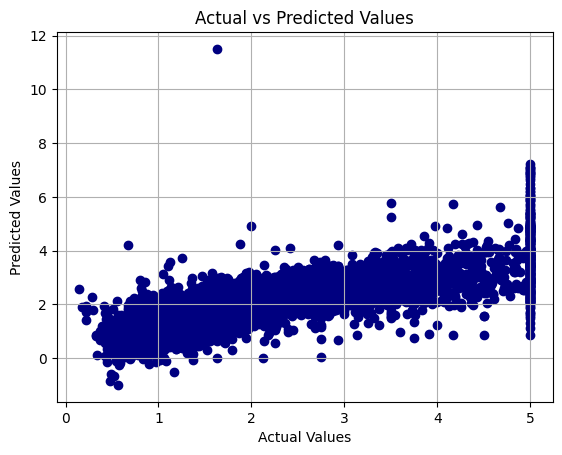

In [ ]:
plt.scatter(y_test, y_pred,c='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

Kode ini membuat scatter plot untuk membandingkan nilai aktual (y_test) dan nilai prediksi (y_pred) dari model regresi linear